<a href="https://colab.research.google.com/github/RobertTalbert/discretecs/blob/master/Graphs_in_Python_with_networkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This document is a short tutorial on how to use [Python](https://www.python.org/) to generate, plot, and work with undirected graphs. A second tutorial on directed graphs will be given out later. 

This tutorial is *not* a complete Python tutorial; and you don't need to be a Python programmer to use Python to work with graphs. If you're not interested in learning Python, just treat this tutorial as a cookbook for when you want to work with a graph. 

All of the basic commands in this tutorial are collected in [a cheat sheet which you can view here](https://gist.github.com/RobertTalbert/41f1ade61b7fa49f9f624ae7c91babb8). 


## Jupyter notebooks and Google Colab

The simplest way to run Python code for working with graphs is to use a **Jupyter notebook** running on **Google Colab**. 

- [Jupyter](https://jupyter.org/) is an interactive document platform that allows you to put together a document with formatted text and executable code side-by-side. This tutorial is being written using a Jupyter notebook. 
- [Google Colab](https://colab.research.google.com/) is a project from Google for creating, hosting, and sharing Jupyter notebooks. It allows you to create Jupyter notebooks and store them in your Google Drive account, so you can share them just like Google Docs. 

By using Jupyter notebooks in Colab, you'll be able to work with code for graphs without having to install anything; and it will be easy to share your work. 

You do not need to know all the ins and outs of these platforms. But one thing you *do* need to know about Jupyter notebooks is that they are made up of **cells** which are containers for information; and there are two kinds of cells, *code cells* and *text cells*. Code cells hold code, and you can run the code by putting your cursor inside the cell and hitting `Shift + Enter` or clicking the play button next to the cell:


In [1]:
for i in range(10): 
  print(i**2)

0
1
4
9
16
25
36
49
64
81


If there is any output from the code, it appears below the cell. 

Another thing to know is that in Jupyter notebooks, code cells operate independently from each other and are  *not* executed from top to bottom in order. This can cause some problems if you aren't careful -- for example if you define a variable in one cell, then change it in another cell, if you go back to the earlier cell the variable will have the new value. 



## `networkX` and `matplotlib`

Like a lot of languages, Python comes with some functions ready to use in the "core" installation, and additional features are added by installing **packages**. We'll be using two packages to work with graphs: 

- `networkX` provides a huge set of specialized functions for generating and working with graphs. [Here is the complete documentation for `networkx`](https://networkx.org/documentation/stable/reference/index.html). 
- `matplotlib` is a general-purpose package for creating graphics and visualizations. 


Importantly, `networkX` is *not* designed to *visualize* graphs -- it only works with them as data structures. If you want to visualize your graphs, then you need `matplotlib` as well. 

To install, or **import**, these packages, put the following commands in a code cell and hit Shift+Enter or hit the play button to run them. (There won't be any output; but once the execution is complete there will be a green checkmark next to the cell.) 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

The `as` at the end defines an abbreviation for the package. Your notebook will now recognize `nx` as `networkx`and `plt` as `matplotlib.pyplot` which saves a lot of keystrokes. 

**Please note: None of the code below will work unless you have imported these packages.** 

## Creating a graph

There are several methods for creating graphs in `networkx`. Here are some of the ones we will use: 

### Start with an empty graph and add edges

To create an empty graph called $G$: 

In [3]:
G = nx.Graph()

On the right, what's happening is that we are calling the function `Graph()` from the package `nx` (which remember is short for `networkx`. Technically what's happening is we're creating an "instance" of the "class" called Graph (this is object-oriented programming terminology). 

This graph has no vertices and no edges. We can add an edge, like this: 


In [4]:
G.add_edge(1,2)

This calls another function, `add_edge`, whose parameters are the names of the vertices that the edge connects. Once you add an edge by specifying the vertices that it connects, the vertices themselves are added to the graph too. 

We can add a bunch of edges all at once by putting them in a **list** and then passing the list using the `.add_edges_from()` function: 

In [5]:
G.add_edges_from([(1,3), (2,4), (2,3)])

Note that
- A [list](https://www.w3schools.com/python/python_lists.asp) in Python uses square brackets `[ ]` as the delimiters. 
- Inside the list being passed, each edge is represented as a pair, for example `(2,4)` is the edge connecting `2` and `4`. 

What are the edges we've added so far? We can call yet another method to find out:

In [6]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 4), (2, 3)])

This seems a little strange because what is `EdgeView`? It's technically something called an "[iterable](https://www.analyticsvidhya.com/blog/2021/07/everything-you-should-know-about-iterables-and-iterators-in-python-as-a-data-scientist/)" in Python, which is a data structure that we can loop over. If you just want to print off the edges, then loop over that list using a `for` loop. In Python this looks like: 

In [7]:
for e in G.edges(): 
  print(e)

(1, 2)
(1, 3)
(2, 4)
(2, 3)


Note: Indentation matters in Python code. If the `print(e)` statement had been all the way to the left, it would throw an error. 

We can do the same with vertices, which are called "nodes" in `networkx`: 

In [8]:
for v in G.nodes(): 
  print(v)

1
2
3
4


#### Side note: Tab completion 

In Jupyter notebooks, whenever you are in a code cell you can position the cursor on a line of code, and a list of possible ways to complete the line will pop up. Then you can scroll down to one, or keep typing to narrow the search, and hit `TAB` to complete the line. This is extremely helpful if you want to explore the methods that are available for a graph. For example, in a code cell, enter `G.` and observe the pop-up:

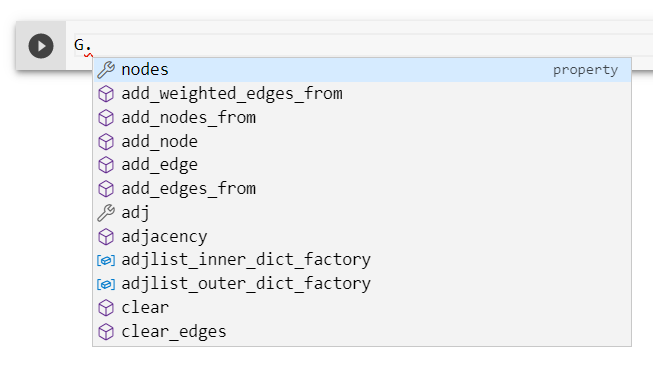

So, for example, note there's an `.add_node()` function if you want just to add a vertex to a graph without adding an edge. 

### Create a graph from an edge list 

Instead of creating an empty graph and then adding edges, we can write up an edge list and then have `networkx` build the graph from the list all in one go, by passing the edge list as a parameter to the Graph constructor. Here is a graph of a small social network with four people (Alice, Bob, Chuck, Darla) and an edge between people who are friends with each other: 

In [9]:
friend_list = [("Alice", "Bob"), ("Alice", "Darla"), ("Chuck", "Bob"), ("Bob", "Darla")]
F = nx.Graph(friend_list)

In [10]:
# Checking the nodes
# Also: Note that Python comments begin with #

for person in F.nodes():
  print(person)

Alice
Bob
Darla
Chuck


### Create a graph from a dictionary

In Python, a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp) is a built-in structure that maps *keys* onto *values*. (These are also called [hash tables](https://www.tutorialspoint.com/data_structures_algorithms/hash_data_structure.htm).) Dictionaries have curly braces `{ }` on the outside; then on the inside, *keys* are associated with *values* by writing the key, then a colon `:`, then either a value or a list of values. 

For example in the social network above, Alice is friends with Bob and Darla; Bob is friends with Alice, Chuck, and Darla; Chuck is only friends with Bob; and Darla is friends with Alice and Bob. As a dictionary this would be represented as: 

```
{"Alice":["Bob", "Darla"], "Bob":["Alice", "Chuck", "Darla"], "Chuck":["Bob"], "Darla":["Alice", "Bob"] }
```

We can create a graph from a dictionary just like we can from an edge list -- by passing the dictionary as a parameter to the Graph constructor: 


In [11]:
friends_dict = {"Alice":["Bob", "Darla"], "Bob":["Alice", "Chuck", "Darla"], 
                "Chuck":["Bob"], "Darla":["Alice", "Bob"] }

F_2 = nx.Graph(friends_dict)

# Notice the edges are the same: 
for e in F_2.edges(): 
  print(e)

('Alice', 'Bob')
('Alice', 'Darla')
('Bob', 'Chuck')
('Bob', 'Darla')


Note that we don't have to list all the connections in both directions. For example, this dictionary gives the same graph as the one above: 

In [12]:
# Once we know X is a friend of Y, we don't have to specify 
# that Y is a friend of X: 

friends_dict_shorter = {"Alice":["Bob", "Darla"], 
                        "Bob":["Chuck", "Darla"], 
                        "Chuck":[], 
                        "Darla":[] }

F_3 = nx.Graph(friends_dict_shorter)
for e in F_3.edges(): 
  print(e)

('Alice', 'Bob')
('Alice', 'Darla')
('Bob', 'Chuck')
('Bob', 'Darla')


## Visualizing graphs

As mentioned above, `networkx` doesn't visualize graphs -- it only treats them like data structures. We use `matplotlib` to visualize. 

First, make sure that `matplotlib` is imported (which we did above). Once it is, then the basic command for visualizing a graph is `nx.draw()`. For example: 

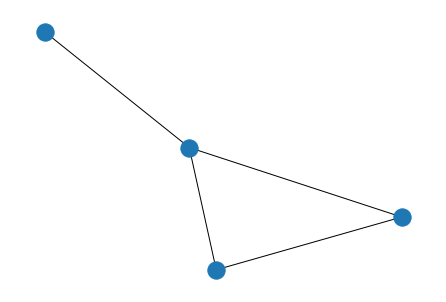

In [13]:
friend_list = [("Alice", "Bob"), ("Alice", "Darla"), ("Chuck", "Bob"), 
               ("Bob", "Darla")]
F = nx.Graph(friend_list)

nx.draw(F)

Like we said: Basic. It might be helpful to show the labels on the vertices to know who's who: 

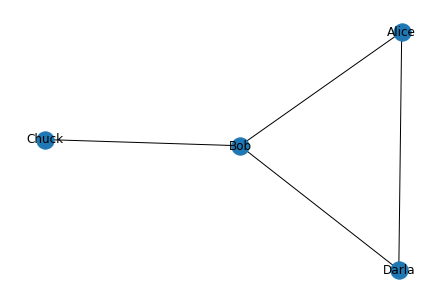

In [14]:
nx.draw(F, with_labels = True)

It's a little hard to read these because of the vertex color, so let's change that: 

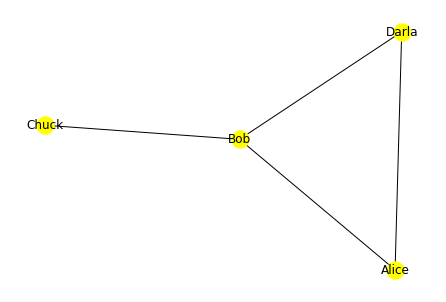

In [15]:
nx.draw(F, with_labels = True, node_color = "yellow")

The "yellow" can be changed to other colors of course. 

Notice that the layout of the graph changed. Using `nx.draw()` visualizes the graph in a random layout that changes each time you run the code. To set this into a fixed layout, pass a parameter called `pos` (for "position") to nx.draw() and set it equal to a layout style. There are several of these styles; the most common one is to arrange the nodes in a circle:

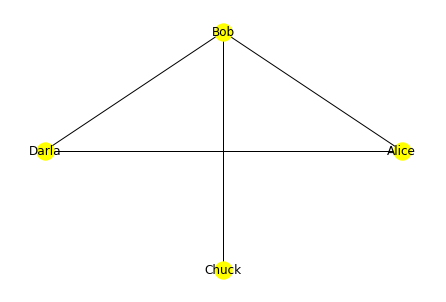

In [16]:
nx.draw(F, with_labels = True, node_color = "yellow", 
        pos = nx.circular_layout(F))

A shortcut for drawing a graph in this circular layout is to use the function `nx.draw_circular()`. It accepts the same parameters as `nx.draw()`: 

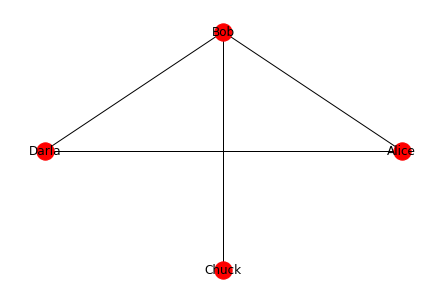

In [17]:
nx.draw_circular(F, with_labels = True, node_color = "red")

This is usually just about as much formatting as we typically want to use in this course. But to learn more, consult the documentation. 

## Creating random graphs

We'll often create a random graph for use in activities. These are also helpful for generating practice exercises for yourself, and for testing out conjectures. 

There are a couple of ways to do this in `networkx`. 

First, we can specify **the number of vertices** in the graph and then give **a probability** that two vertices will be connected with an edge. This uses a special constructor, `.gnp_random_graph()`: 

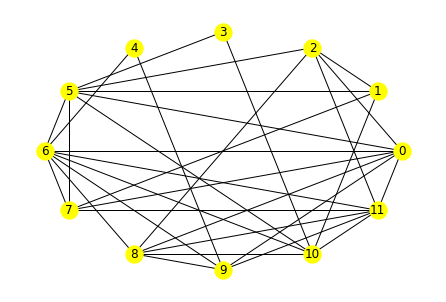

In [18]:
# A random graph with 12 vertices and a 50% chance of connection
random1 = nx.gnp_random_graph(12, 0.5)
nx.draw_circular(random1, with_labels = True, node_color = "yellow")

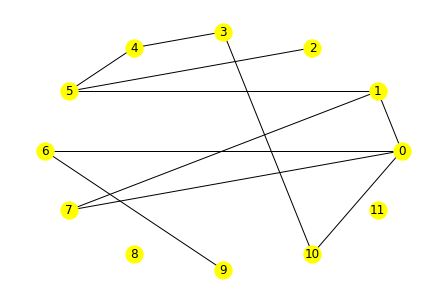

In [19]:
# A random graph with 12 vertices and a 20% chance of connection
random1 = nx.gnp_random_graph(12, 0.2)
nx.draw_circular(random1, with_labels = True, node_color = "yellow")

Second, we can specify the **number of vertices** and the **number of edges** we want in the graph, and tell `networkx` to randomly select a graph with that number of vertices and edges. This uses `.gnm_random_graph()`. 

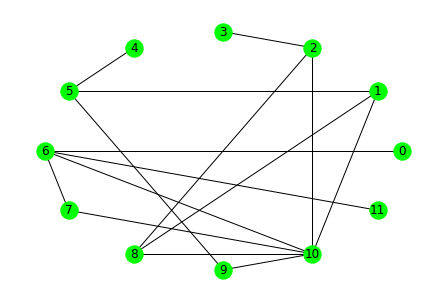

In [20]:
# A randomly selected graph with 12 vertices and 15 edges
random2 = nx.gnm_random_graph(12,15)
nx.draw_circular(random2, with_labels = True, node_color = "lime")

## Getting information from a graph

We'll use this graph as a running example below: 


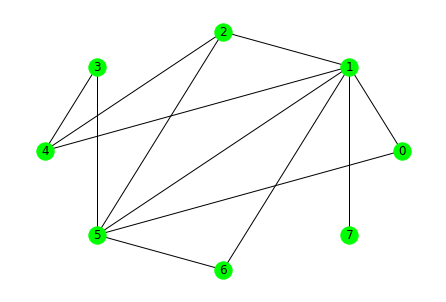

In [21]:
example = nx.gnp_random_graph(8, 0.5)
nx.draw_circular(example, with_labels = True, node_color = "lime")

### Converting a graph to different formats

We can get an edge list from an existing graph: 


In [22]:
list(example.edges())

[(0, 1),
 (0, 5),
 (1, 2),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (5, 6)]

We can also do this using `to_edgelist`: 

In [23]:
nx.to_edgelist(example)

EdgeDataView([(0, 1, {}), (0, 5, {}), (1, 2, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (3, 5, {}), (5, 6, {})])

The output is a little different. If the graph were *weighted* (a concept we'll discuss later) then the weights on each edge would appear in the curly braces. 

We can similarly convert into a dictionary using `to_dict_of_lists()`: 

In [24]:
nx.to_dict_of_lists(example)

{0: [1, 5],
 1: [0, 2, 4, 5, 6, 7],
 2: [1, 4, 5],
 3: [4, 5],
 4: [1, 2, 3],
 5: [0, 1, 2, 3, 6],
 6: [1, 5],
 7: [1]}

### Getting information about a graph and its parts

To find the number of vertices or the number of edges in a graph, the functions are simple: 

In [25]:
example.number_of_nodes()  # Remember "node" and "vertex" are the same

8

In [26]:
example.number_of_edges()

12

If you want to find the degree of a vertex in a graph (the number of edges that are incident with that vertex), it's a little more complicated. The `.degree()` function doesn't return a vertex's degree, but rather a *dictionary* of *each* vertex, and its degree: 

In [27]:
nx.degree(example)

DegreeView({0: 2, 1: 6, 2: 3, 3: 2, 4: 3, 5: 5, 6: 2, 7: 1})

If you really only want the degree of a single vertex, assign this dictionary to a variable name and then use square brackets to reference the vertex you want: 

In [28]:
d = nx.degree(example)  # Create the dictionary
d[6]  # Return the information for the entry of "6"

2

Similarly, if you want to find the *neighbors* of a vertex (all the vertices that share an edge with that vertex), first use `.neighbors()` to create an iterable of all the neighbors, then loop through it: 

In [29]:
neighbors_of_six = example.neighbors(6)
for n in neighbors_of_six: print(n)

1
5


## Creating special graphs

To generate $K_n$, the complete graph on $n$ vertices, use `nx.complete_graph()`: 

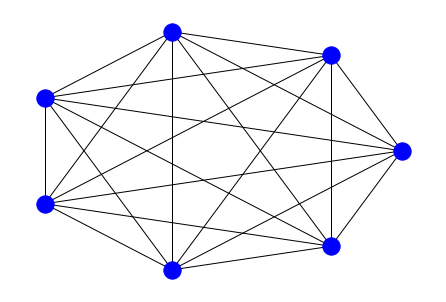

In [30]:
K7 = nx.complete_graph(7)
nx.draw_circular(K7, node_color = "blue")

The complete bipartite graph $K_{m,n}$ uses `nx.complete_bipartite_graph()`: 

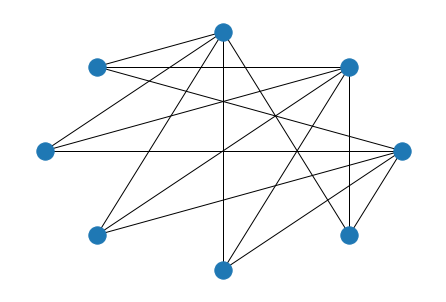

In [31]:
k35 = nx.complete_bipartite_graph(3,5)
nx.draw_circular(k35)

The cycle graph $C_n$ is built using `nx.cycle_graph()`: 

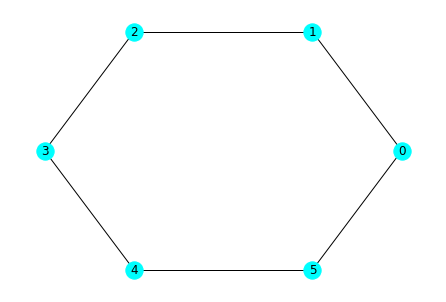

In [32]:
c6 = nx.cycle_graph(6)
nx.draw_circular(c6, node_color = "cyan", with_labels = True)

And there's a similar function for $P_n$, the path graph on $n$ vertices: 

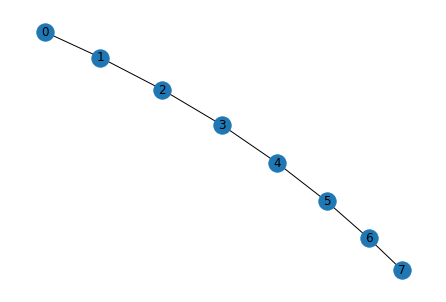

In [33]:
p8 = nx.path_graph(8)
nx.draw(p8, with_labels = True)

There are lots more specialty graphs available for construction. [See here for a full list.](https://networkx.org/documentation/stable/reference/generators.html) Try making some of them and see what they look like!

## Briefly putting this all together

With all this functionality, we can do some sophisticated investigations of basic graphs using Python. 

For example, consider the complete bipartite graph $K_{m,n}$. **How many edges are in $K_{m,n}$ for any given values of $m$ and $n$?** Well, let's write some code to investigate. The code below prints off an unformatted table with different values of $m$ from 1 to 10 in the first column, values of $n$ from 1 to 10 in the second, and then the number of edges in $K_{m,n}$ in the third column -- all computed using `networkx`.

In [34]:
for m in range(1,11):
  for n in range(1,11):
    k = nx.complete_bipartite_graph(m,n)
    print(m, n, k.number_of_edges())

1 1 1
1 2 2
1 3 3
1 4 4
1 5 5
1 6 6
1 7 7
1 8 8
1 9 9
1 10 10
2 1 2
2 2 4
2 3 6
2 4 8
2 5 10
2 6 12
2 7 14
2 8 16
2 9 18
2 10 20
3 1 3
3 2 6
3 3 9
3 4 12
3 5 15
3 6 18
3 7 21
3 8 24
3 9 27
3 10 30
4 1 4
4 2 8
4 3 12
4 4 16
4 5 20
4 6 24
4 7 28
4 8 32
4 9 36
4 10 40
5 1 5
5 2 10
5 3 15
5 4 20
5 5 25
5 6 30
5 7 35
5 8 40
5 9 45
5 10 50
6 1 6
6 2 12
6 3 18
6 4 24
6 5 30
6 6 36
6 7 42
6 8 48
6 9 54
6 10 60
7 1 7
7 2 14
7 3 21
7 4 28
7 5 35
7 6 42
7 7 49
7 8 56
7 9 63
7 10 70
8 1 8
8 2 16
8 3 24
8 4 32
8 5 40
8 6 48
8 7 56
8 8 64
8 9 72
8 10 80
9 1 9
9 2 18
9 3 27
9 4 36
9 5 45
9 6 54
9 7 63
9 8 72
9 9 81
9 10 90
10 1 10
10 2 20
10 3 30
10 4 40
10 5 50
10 6 60
10 7 70
10 8 80
10 9 90
10 10 100


(Note: `range(a,b)` in Python produces a list of integers starting at `a` and ending at `b-1`.) 

Take a look at these 100 data points we just generated. Based on the data, what's a conjecture you might make about how many edges are in $K_{m,n}$? How might you go about proving that conjecture?

This is a general pattern of use we will see from these tools: **We use the computer to generate data about graphs, then we make a conjecture about what we're seeing, then we try to prove our conjecture.** 